# Gaussiane multivariate e significato della matrice di covarianza

Tracciamo una gaussiana di date media e varianza $\mathcal{N}(x;\mu, \sigma)$ per un certo numero di campioni distribuiti uniformememnte e disegnamo sull'asse delle ascisse un insieme di campioni tratti da questa distribuzione.

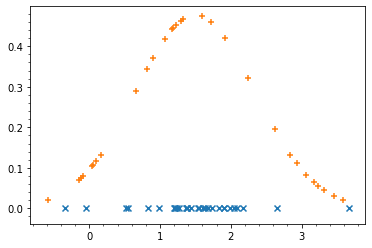

In [4]:
import numpy as np
from numpy.random import default_rng
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import math

rg = default_rng()

mu, sigma = 1.5, 0.7

plt.minorticks_on()

data = rg.normal(mu,sigma,30)

plt.scatter(data,np.zeros((30,)),marker="x")

x = rg.uniform(mu - 3 * sigma, mu + 3 * sigma, 30)

y = multivariate_normal([mu],[sigma])

plt.scatter(x,y.pdf(x),marker="+")

Date due distribuzioni normali con medie descritte dal vettore $\boldsymbol\mu$ e varianze $\boldsymbol\sigma$,  calcoliamo la matrice di covarianza di un vettore di campioni $\operatorname{Cov}(\bar{x_0},\bar{x_0})$ estratti 
dalla prima distribuzione e poi $\boldsymbol\Sigma=\operatorname{Cov}(\bar{x_0},\bar{x_1})$ con $\bar{x_0}$ e $\bar{x_1}$ tratti da entrambe le distribuzioni. Infine mostriamo lo scatter plot di $\bar{x_0}$ e $\bar{x_1}$. Che succede all'aumentare del numero di campioni?

[[0.48202533 0.48202533]
 [0.48202533 0.48202533]]
[[ 0.48202533 -0.00404072]
 [-0.00404072  0.04102088]]


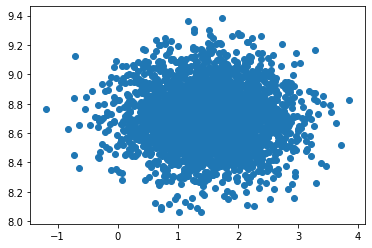

In [5]:
mu, sigma = np.array([1.5, 8.7]), np.array([0.7, 0.2])
x0 = rg.normal(mu[0],sigma[0],3000)
x1 = rg.normal(mu[1],sigma[1],3000)

plt.scatter(x0,x1)

print(np.cov(np.array([x0,x0])))
cov=np.cov(np.array([x0,x1]))
print(cov)

A partire dalla precedente matrice di covarianza disegnamo la distribuzione bivariata con media $\boldsymbol\mu$: $\mathcal{N}(\mathbf{x}; \boldsymbol\mu, \boldsymbol\Sigma)$

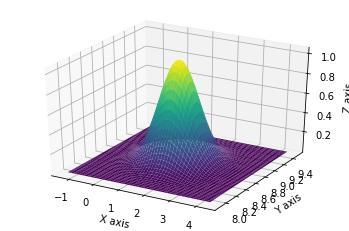

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
#from mpl_toolkits.mplot3d import Axes3D

#Crea la griglia e la distribuzione multivariata
x = np.linspace(mu[0] - 4*sigma[0],mu[0] + 4*sigma[0],500)
y = np.linspace(mu[1] - 4*sigma[1],mu[1] + 4*sigma[1],500)

X, Y = np.meshgrid(x,y)  # array di coordinate x ed y separate,
                         # di dimensione (500, 500)

pos = np.empty(X.shape + (2,))     # pos.shape = (500, 500, 2)
pos[:, :, 0] = X; pos[:, :, 1] = Y # crea l'array dei punti del grafico

rv = multivariate_normal(mu, cov)

#Crea un plot 3D
fig = plt.figure()
ax = fig.gca(projection='3d') # acquisisce l'istanza di Axes3D della figura
                              # e di fatto genera un plot 3D

ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

# Esercizi

1. Estrarre un certo numero di campioni uniformememnte nell'intervallo $\left[\mu \pm 3\sigma \right]$ da una distribuzione gaussiana di data media e varianza $\mathcal{N}(x;\mu, \sigma)$, a scelta dello studente. Stimare media e varianza a partire dai campioni e fare il plot della distribuzione $\mathcal{N}$ e della sua stima.
Ripetere il procedimento estraendo i campioni in modo stratificato lungo l'intervallo (il numero di strati è a scelta) e poi estraendo i campioni dalla stessa $\mathcal{N}$. Disegnare le curve in un unico plot. Cosa succede alle stime all'aumentare e diminuire del numero di campioni e/o di strati?